In [20]:
import random
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from math import cos, sin, pi, floor, ceil, sqrt
from scipy.integrate import quad
from scipy.stats import poisson

#random.seed(42)

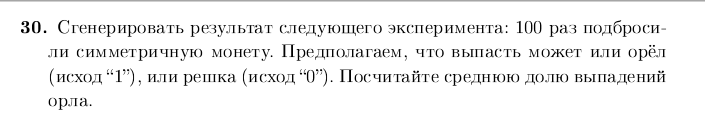

In [3]:
class BernDistribution:
  def __init__(self, p = 0.5):
    self.p = p

  def __call__(self, k = 1):
    return random.choices([0, 1], weights=[1 - self.p, self.p], k=k)

selection_size = 100
bin_distr = BernDistribution()
choices = bin_distr(selection_size)
print(sum(choices) / selection_size)

0.5


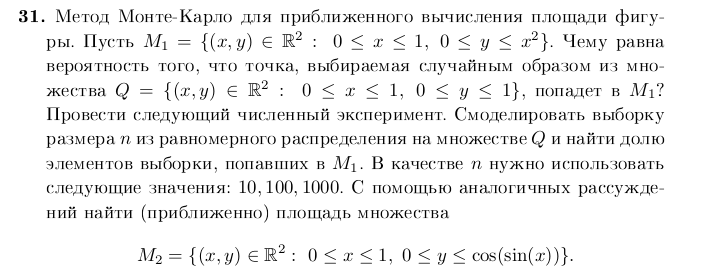

In [ ]:
def get_square(is_belong, selection_size=1000, left = 0, right = 1) -> float:
  X = np.random.uniform(left, right, selection_size)
  Y = np.random.uniform(left, right, selection_size)
  return sum([is_belong(x, y) for x, y in zip(X, Y)]) / selection_size

sizes = [10, 100, 1000]
M1 = lambda x : x*x
M2 = lambda x : cos(sin(x))
is_belong = lambda f : lambda x, y : 0 <= x <= 1 and 0 <= y <= f(x)
for size in sizes:
  print(f"M2 square with size {size}: {get_square(is_belong(M1), size)}")
print(f"Scipy square: {quad(M1, 0, 1)[0]}")
for size in sizes:
  print(f"M2 square with size {size}: {get_square(is_belong(M2), size)}")
print(f"Scipy square: {quad(M2, 0, 1)[0]}")

M2 square with size 10: 0.3
M2 square with size 100: 0.39
M2 square with size 1000: 0.337
Scipy square: 0.33333333333333337
M2 square with size 10: 0.8
M2 square with size 100: 0.82
M2 square with size 1000: 0.871
Scipy square: 0.868740039576976


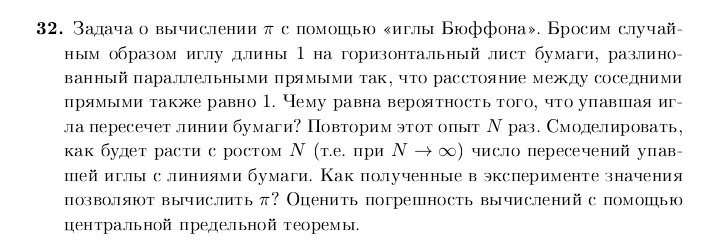

По теореме Берри-Эссена имеем следующее:
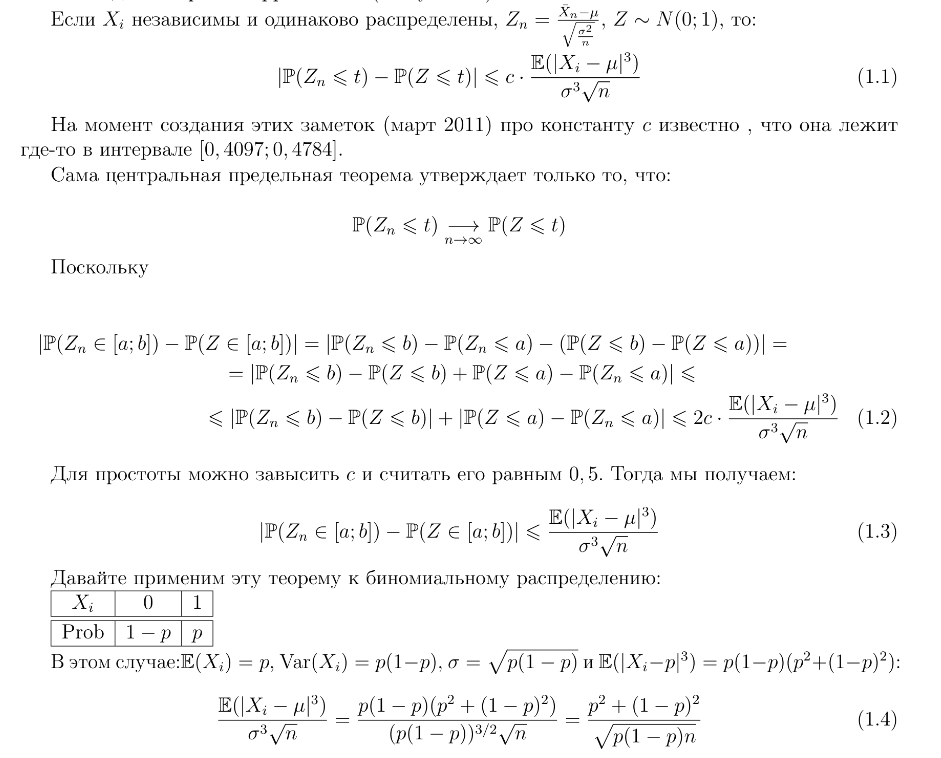


Найдем погрешность для $p = \frac{2}{\pi}$\
$\Large \delta_n = \frac{1}{\sqrt{n}}\left(\frac{2}{\pi}\sqrt{\frac{2}{\pi - 2}} + \frac{\pi - 2}{\pi}\sqrt{\frac{\pi - 2}{2}}\right) \approx \frac{1.12}{\sqrt{n}}$ \
$\varepsilon_{\text{отн}} = \frac{\delta_n \pi}{2} ⇒ \Delta_n = \pi \varepsilon_{\text{отн}} \approx \frac{5.527}{\sqrt{n}}$

In [51]:
border = 1000

def buffon_choice():
  y = random.uniform(0, border)
  alpha = random.uniform(0, pi)
  return y, alpha

def is_intersect(y, alpha):
  return y - abs(cos(alpha) / 2) <= floor(y) or y + abs(cos(alpha) / 2) >= ceil(y)

def get_probs(N) -> list:
  ans = []
  count = 0
  for i in range(N):
    count += int(is_intersect(*buffon_choice()))
    ans.append(count / (i + 1))
  return ans

def get_error_rate(n: int):
  return 5.524 / sqrt(n)

def calc_pi(N: int, pi_place = 4.5):
  probs = get_probs(N)
  fig, ax1 = plt.subplots(1, 1, layout='constrained', sharex=True, sharey=True)
  ax1.plot([i for i in range(N)], probs, [2 / pi for _ in range(N)])
  ax1.set_xlabel("N")
  ax1.annotate(xy=(N / 3, 2 / pi), text="2 / pi", xytext=(N / 2, 0.7), arrowprops=dict(facecolor='black', shrink=0.001))
  ax1.set_ylabel("Доля пересечений иглы прямых")
  _, ax2 = plt.subplots(1, 1)
  ax2.plot([i for i in range(N)], [2 / i if i != 0 else 0 for i in probs], [pi for _ in range(N)])
  ax2.annotate(xy=(2 * N / 3, pi), text="pi", xytext=(13 * N / 15, pi_place), arrowprops=dict(facecolor='black', shrink=0.001))
  ax2.set_xlabel("N")
  ax2.set_ylabel("Вычисленное таким образом pi")
  plt.show()
  my_pi = 2 / probs[-1]
  print(f"My pi: {my_pi}")
  print(f"pi: {pi}")
  print(f"abs err: {abs(pi - my_pi)}")
  print(f"theoretic err: {get_error_rate(N)}")

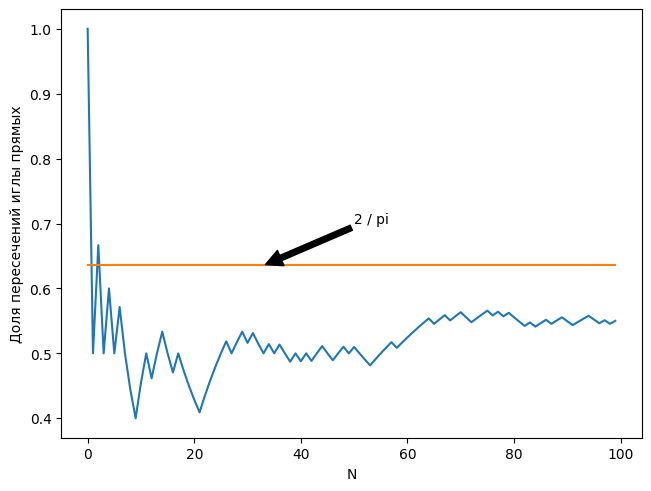

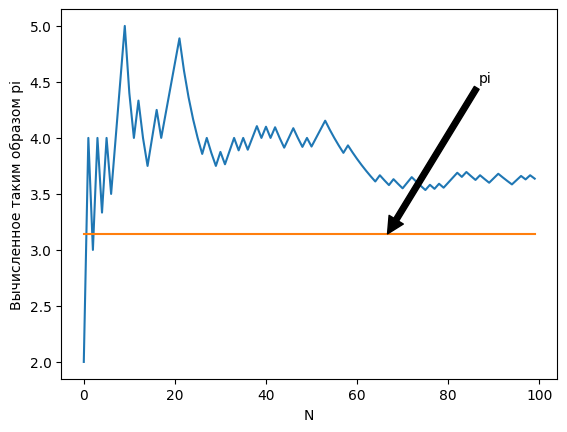

My pi: 3.6363636363636362
pi: 3.141592653589793
abs err: 0.4947709827738431
theoretic err: 0.5524


In [52]:
calc_pi(100)

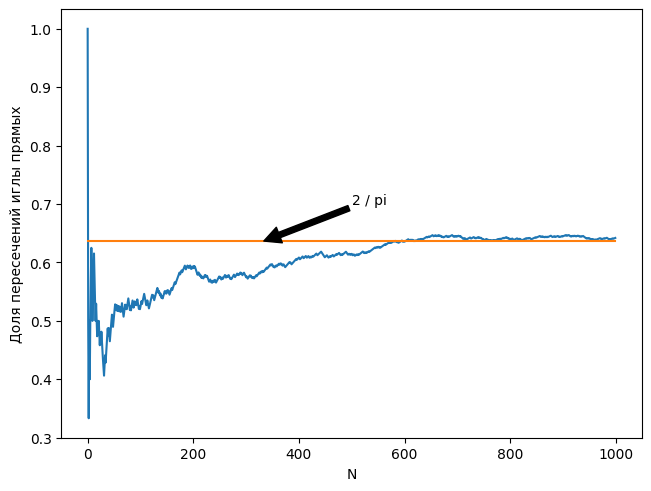

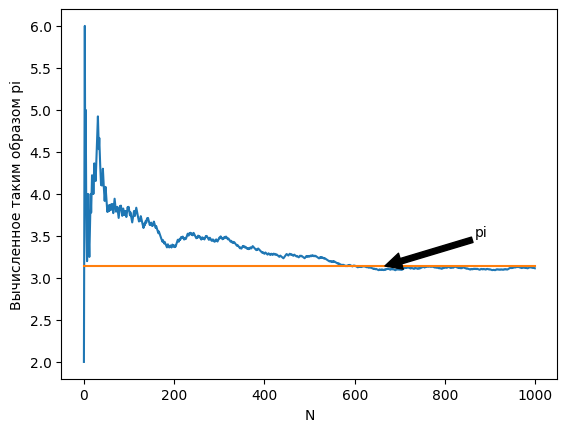

My pi: 3.115264797507788
pi: 3.141592653589793
abs err: 0.026327856082005052
theoretic err: 0.17468421794770128


In [53]:
calc_pi(1000, 3.5)

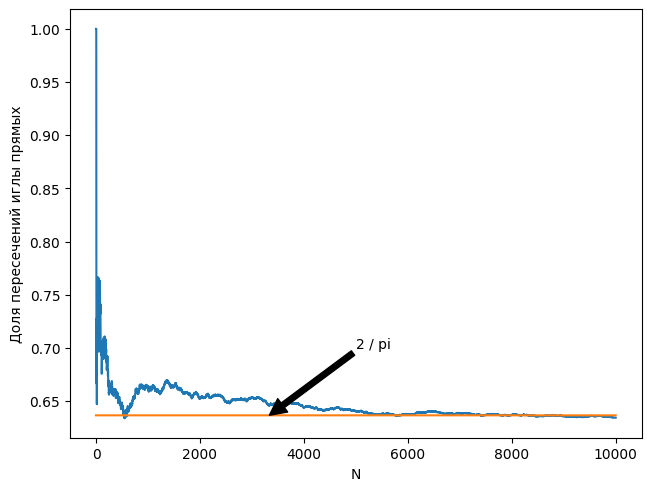

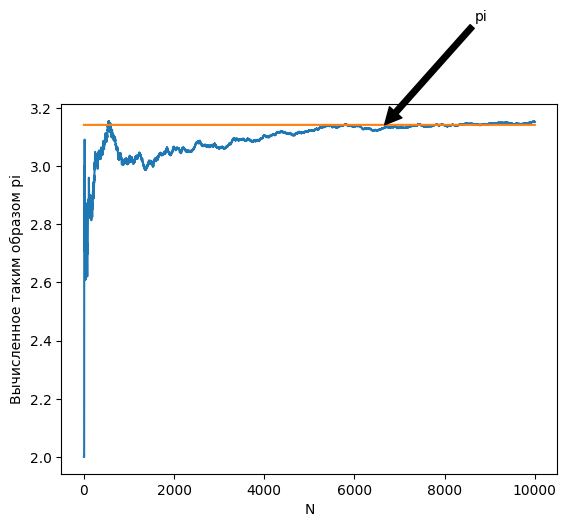

My pi: 3.1525851197982346
pi: 3.141592653589793
abs err: 0.01099246620844152
theoretic err: 0.05524


In [54]:
calc_pi(10000, 3.5)

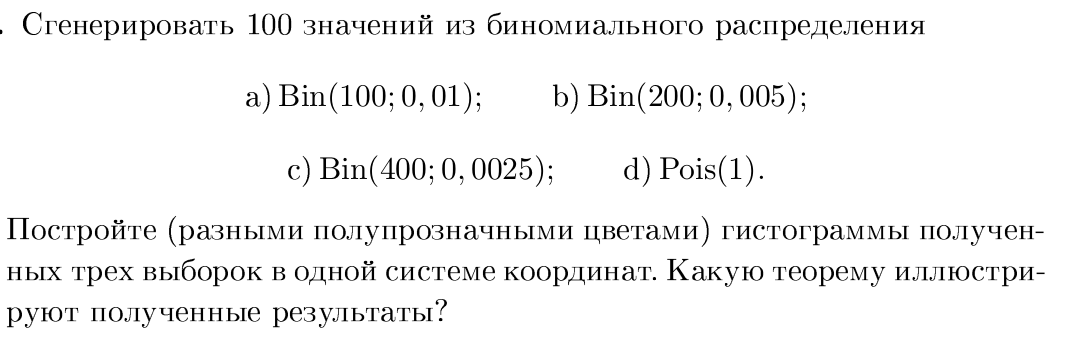

In [45]:
class BinDistribution:
  def __init__(self, n, p):
    self.bern = BernDistribution(p)
    self.n = n

  def __call__(self, size: int) -> list:
    return [sum(self.bern(self.n)) for _ in range(size)]

In [46]:
b1 = BinDistribution(100, 0.01)
b2 = BinDistribution(200, 0.005)
b3 = BinDistribution(400, 0.0025)

In [47]:
size = 100

v1 = b1(size)
v2 = b2(size)
v3 = b3(size)
v4 = poisson.rvs(1, size=size)

In [48]:
BinA = pd.DataFrame({"Bin(100, 0.01)" : v1})
BinB = pd.DataFrame({"Bin(200, 0.005)" : v2})
BinC = pd.DataFrame({"Bin(400, 0.0025)" : v3})
BinD = pd.DataFrame({"Pois(1)": v4})

<Axes: ylabel='Count'>

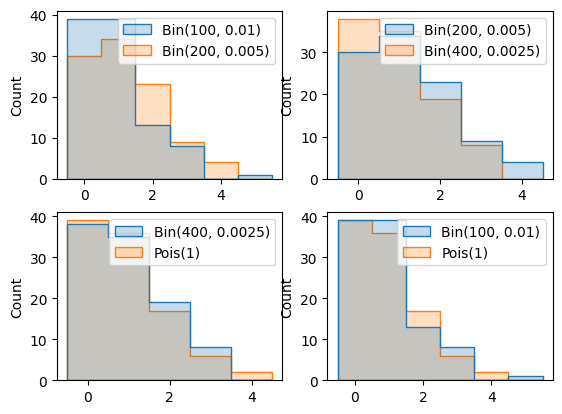

In [49]:
fig, ax = plt.subplots(2, 2)
sns.histplot(data=pd.concat([BinA, BinB]), element="step", discrete=True, ax=ax[0, 0])
sns.histplot(data=pd.concat([BinB, BinC]), element="step", discrete=True, ax=ax[0, 1])
sns.histplot(data=pd.concat([BinC, BinD]), element="step", discrete=True, ax=ax[1, 0])
sns.histplot(data=pd.concat([BinA, BinD]), element="step", discrete=True, ax=ax[1, 1])

<Axes: ylabel='Count'>

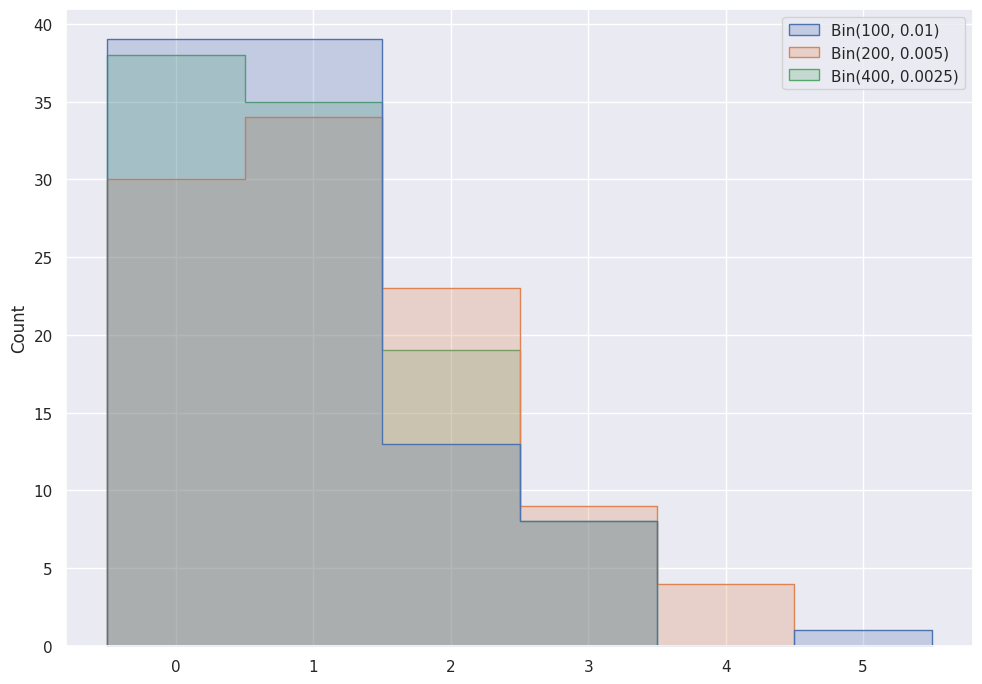

In [61]:
BinA = pd.DataFrame({"Bin(100, 0.01)" : v1})
BinB = pd.DataFrame({"Bin(200, 0.005)" : v2})
BinC = pd.DataFrame({"Bin(400, 0.0025)" : v3})

Bin = pd.concat([BinA, BinB, BinC])
sns.histplot(
    data=Bin,
    element="step",
    discrete=True,
)

<Axes: ylabel='Count'>

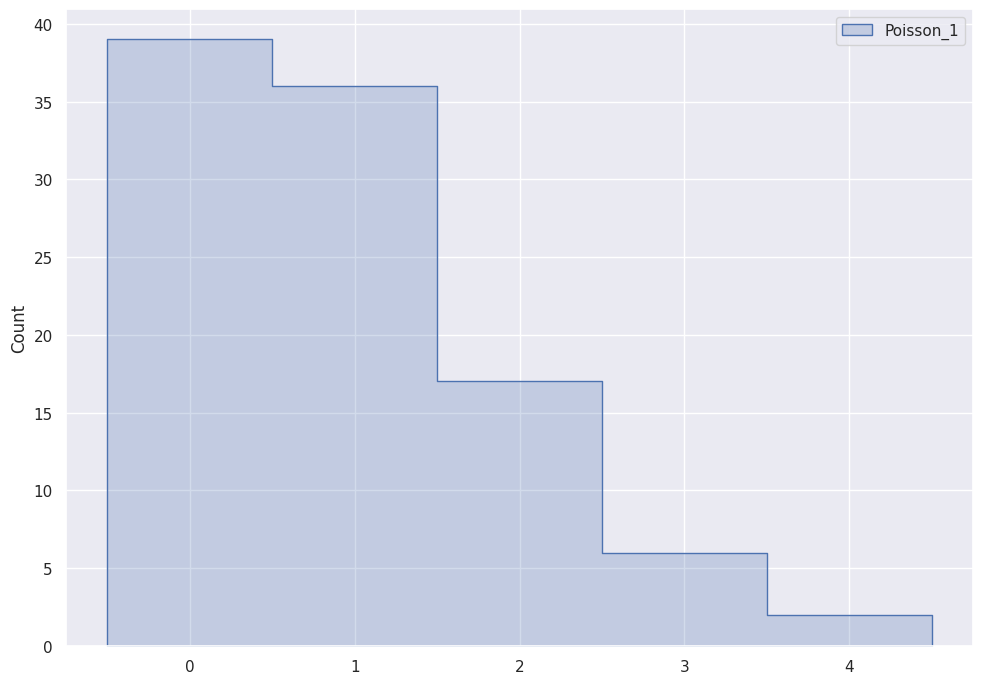

In [62]:
sns.histplot(
    data=pd.DataFrame({"Poisson_1" : v4}),
    discrete=True,
    element="step",
)

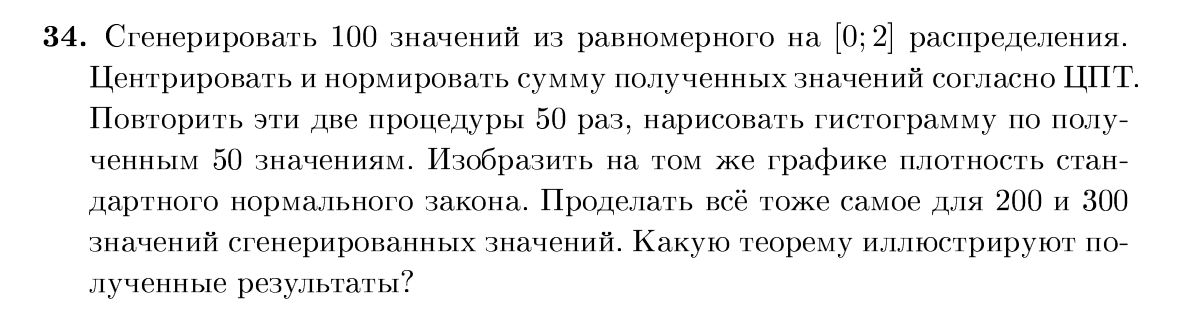

In [ ]:
def get_uniform(N: int) -> list:
  size = 100
  ans = [0] * N
  for i in range(N):
    value = np.sum(np.random.uniform(0, 2, size=size))
    value -= size * (0 + 2) / 2
    value /= sqrt(size * (2 - 0)**2 / 12)
    ans[i] = value
  return ans

def build_graphic(N: int):
  count, bins, ignored = plt.hist(get_uniform(N), 30, density=True)
  mu = 0
  sigma = 1
  plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
  plt.show()

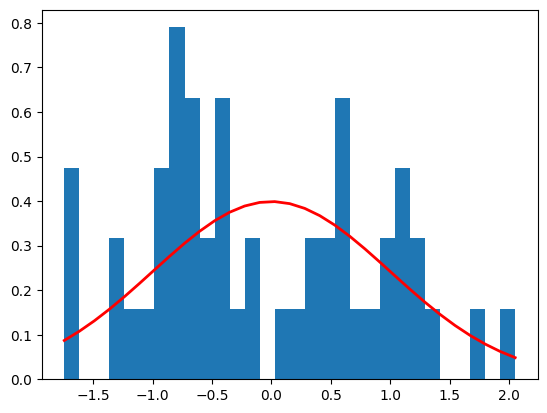

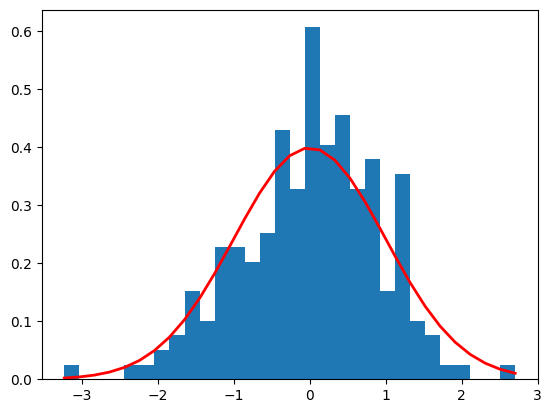

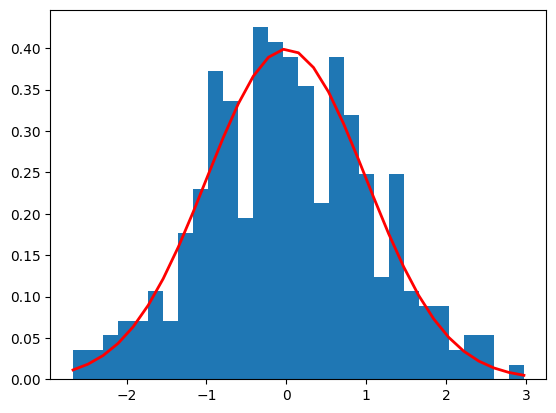

In [ ]:
values = [50, 200, 300]
for value in values:
  build_graphic(value)